## Capital One Data Challenge

## Importing Libraries

In [220]:
import pandas as pd
import numpy as np
import sys
import matplotlib.pyplot as plt
%matplotlib inline
from cycler import cycler
import datetime
palette = ['#ff0000', '#663600', '#a3cc00', '#80ffc3', '#0088ff', '#d9bfff', '#a6296c', '#8c4646', '#ff8800', '#5e664d', '#269991', '#1d3f73', '#7e468c', '#d96236', '#7f2200','#008B8B','#00008B','#8B0000','#8FBC8F','#9400D3','#00BFFF','#FFD700','#FF69B4','#4B0082','#32CD32']
plt.rc( 'lines', linewidth = 4 )
plt.rc( 'axes', prop_cycle = ( cycler( 'color', palette ) ) )

plt.rcParams['figure.figsize'] = (6,4)
plt.rcParams['figure.dpi'] = 150

pd.set_option('display.max_columns',500)
pd.set_option('display.max_rows',1000)

## Clean Zillow Dataset

In [328]:
# Import Zillow dataset
df_cost = pd.read_csv("Zip_Zhvi_2bedroom.csv")
df_cost.head()

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,1996-10,1996-11,1996-12,1997-01,1997-02,1997-03,1997-04,1997-05,1997-06,1997-07,1997-08,1997-09,1997-10,1997-11,1997-12,1998-01,1998-02,1998-03,1998-04,1998-05,1998-06,1998-07,1998-08,1998-09,1998-10,1998-11,1998-12,1999-01,1999-02,1999-03,1999-04,1999-05,1999-06,1999-07,1999-08,1999-09,1999-10,1999-11,1999-12,2000-01,2000-02,2000-03,2000-04,2000-05,2000-06,2000-07,2000-08,2000-09,2000-10,2000-11,2000-12,2001-01,2001-02,2001-03,2001-04,2001-05,2001-06,2001-07,2001-08,2001-09,2001-10,2001-11,2001-12,2002-01,2002-02,2002-03,2002-04,2002-05,2002-06,2002-07,2002-08,2002-09,2002-10,2002-11,2002-12,2003-01,2003-02,2003-03,2003-04,2003-05,2003-06,2003-07,2003-08,2003-09,2003-10,2003-11,2003-12,2004-01,2004-02,2004-03,2004-04,2004-05,2004-06,2004-07,2004-08,2004-09,2004-10,2004-11,2004-12,2005-01,2005-02,2005-03,2005-04,2005-05,2005-06,2005-07,2005-08,2005-09,2005-10,2005-11,2005-12,2006-01,2006-02,2006-03,2006-04,2006-05,2006-06,2006-07,2006-08,2006-09,2006-10,2006-11,2006-12,2007-01,2007-02,2007-03,2007-04,2007-05,2007-06,2007-07,2007-08,2007-09,2007-10,2007-11,2007-12,2008-01,2008-02,2008-03,2008-04,2008-05,2008-06,2008-07,2008-08,2008-09,2008-10,2008-11,2008-12,2009-01,2009-02,2009-03,2009-04,2009-05,2009-06,2009-07,2009-08,2009-09,2009-10,2009-11,2009-12,2010-01,2010-02,2010-03,2010-04,2010-05,2010-06,2010-07,2010-08,2010-09,2010-10,2010-11,2010-12,2011-01,2011-02,2011-03,2011-04,2011-05,2011-06,2011-07,2011-08,2011-09,2011-10,2011-11,2011-12,2012-01,2012-02,2012-03,2012-04,2012-05,2012-06,2012-07,2012-08,2012-09,2012-10,2012-11,2012-12,2013-01,2013-02,2013-03,2013-04,2013-05,2013-06,2013-07,2013-08,2013-09,2013-10,2013-11,2013-12,2014-01,2014-02,2014-03,2014-04,2014-05,2014-06,2014-07,2014-08,2014-09,2014-10,2014-11,2014-12,2015-01,2015-02,2015-03,2015-04,2015-05,2015-06,2015-07,2015-08,2015-09,2015-10,2015-11,2015-12,2016-01,2016-02,2016-03,2016-04,2016-05,2016-06,2016-07,2016-08,2016-09,2016-10,2016-11,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06
0,61639,10025,New York,NY,New York,New York,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,798600.0,798800.0,801500.0,804600.0,814900.0,828300.0,835700.0,849300.0,858100.0,854000.0,834800.0,821700.0,830300.0,853700.0,868300.0,875200.0,882200.0,892400.0,905000.0,924000.0,934400.0,932100.0,927500.0,923600.0,907900.0,890900.0,883400.0,896100.0,923900.0,952900.0,964600.0,972500.0,973800.0,973400.0,966500.0,966800.0,967100.0,974800.0,976800.0,976100.0,973700.0,974500.0,973200.0,966400.0,950400.0,933300.0,920900.0,909400.0,891400.0,873300.0,858800.0,850200.0,842800.0,834000.0,828800.0,821400.0,813900.0,813300.0,821500.0,831700.0,845100.0,854500.0,858900.0,859200.0,863500.0,876000.0,886100.0,890000.0,894200.0,901800.0,909500.0,913300.0,907400.0,900000.0,897700.0,896300.0,892300.0,890400.0,888600.0,891700.0,899500.0,904400.0,908200.0,914000.0,915100.0,912300.0,914000.0,921100.0,923300.0,917300.0,915000.0,922800.0,929100.0,937700.0,955700.0,974200.0,995500.0,1019500.0,1035100.0,1054900.0,1079900,1092600,1103500,1118800,1139300,1154600,1144100,1120300,1125500,1136000,1135100,1130000,1138200,1153700,1174800,1185400,1188400,1189700,1193700,1199900,1201400,1202600,1214200,1235200,1258000,1287700,1307200,1313900,1317100,1327400,1338800.0,1350400.0,1356600.0,1358500.0,1364000,1373300,1382600,1374400,1364100,1366300,1354800.0,1327500,1317300,1333700,1352100,1390000,1431000
1,84654,60657,Chicago,IL,Chicago,Cook,2,167700.0,166400.0,166700.0,167200.0,166900.0,166900.0,168000.0,170100.0,171700.0,173000.0,17460

In [43]:
# Understand the Zillow dataset
def main():
    print("***Count number of rows and columns in the dataset***")
    print("Number of rows and columns in the dataset", df_cost.shape, sep='\n')
    print("***Look at the type of the variables in the dataset***")
    print("Type of variables in the dataset", df_cost.dtypes, sep='\n')
    print("***Find duplicated rows in the dataset***")
    print("Duplicated rows in the dataset", df_cost.duplicated(subset=None, keep='first'))
    print("***Find duplicated columns in the dataset***")
    print("Duplicated columns in the dataset", df_cost.T.duplicated().sum())
    print("***Find negative values in cost***")
    print("Count all negative values in cost",df_cost.iloc[:,7:].agg(lambda x: sum(x < 0)).sum())
    print("***Count all NaN in a DataFrame (both columns & Rows)***")
    print("Total NaN in DataFrame" , df_cost.isnull().sum().sum(), sep='\n')
    print("***Count NaN in each column of a DataFrame***")
    print("Nan in each columns" , df_cost.isnull().sum(), sep='\n')
    print("***Count percentage of NaN in each column of the DataFrame***")
    print("Percentage of NaN in each column", df_cost.isnull().sum() * 100 / len(df_cost),sep='\n')
    
if __name__ == '__main__':
    main()

***Count number of rows and columns in the dataset***
Number of rows and columns in the dataset
(8946, 262)
***Look at the type of the variables in the dataset***
Type of variables in the dataset
RegionID        int64
RegionName      int64
City           object
State          object
Metro          object
CountyName     object
SizeRank        int64
1996-04       float64
1996-05       float64
1996-06       float64
1996-07       float64
1996-08       float64
1996-09       float64
1996-10       float64
1996-11       float64
1996-12       float64
1997-01       float64
1997-02       float64
1997-03       float64
1997-04       float64
1997-05       float64
1997-06       float64
1997-07       float64
1997-08       float64
1997-09       float64
1997-10       float64
1997-11       float64
1997-12       float64
1998-01       float64
1998-02       float64
1998-03       float64
1998-04       float64
1998-05       float64
1998-06       float64
1998-07       float64
1998-08       float64
1998-09     

There are several data quality issues in the dataset.
1. There are 266391 missing values in the dataset. Cost before 2010 has more than 1000 missing values. Missing values will hinder the further analysis. Since there are 250 missing values in the "Metro" column, I will use "City" to filter the dataset.
2. The column names for the cost represent values of the date variable. This will cause one column has two variables. Also, it will hinder the further analysis of the time series data.
3. Two data types exist in the cost values. One is float64 and another is int64. To facilitate the analysis, I will convert all the data types of cost to integer.
4. some data are misrepresented. In the "city" column, some values are not cities, such as "Cinco Ranch". Therefore, I will try to include all the boroughs in the New York City when filtering.

## Determine the Time Range of the Cost

In [329]:
# Create a function to transform cost column header to time column
def gather( df_cost, key, value, cols ):
    id_vars = [ col for col in df_cost.columns if col not in cols ]
    id_values = cols
    var_name = key
    value_name = value
    return pd.melt( df_cost, id_vars, id_values, var_name, value_name )

In [330]:
# Data preparation
def dataPrepare1(df_cost):
    # Rename the column of RegionName to zipcode
    df_cost.rename(index=str, columns={"RegionName": "zipcode"},inplace=True)
     # Use function gather to transform cost column header to time column
    df_cost = gather( df_cost, 'Time', 'Cost', df_cost.iloc[:, 7:] )
    # Convert Cost Column to float data type
    df_cost.Cost = df_cost.Cost.astype('float64')
    # Convert zipcode Column to string data type
    df_cost.zipcode = df_cost.zipcode.astype(str)
    # Filter the dataset use state and city
    df_cost = df_cost[(df_cost["State"] == "NY") & (df_cost["City"] == "New York")].copy()
    # Convet Time column to datetime data type
    df_cost.Time = pd.to_datetime(df_cost.Time, format='%Y-%m')
    # Drop unnecessary columns
    df_cost.drop(["City","State","Metro","CountyName"],axis=1,inplace=True)
    return df_cost

In [204]:
df0_cost = dataPrepare1(df_cost)
df0_cost

,RegionID,zipcode,SizeRank,Time,Cost
0,61639,10025,1,1996-04-01,NaN
2,61637,10023,3,1996-04-01,NaN
13,61703,10128,14,1996-04-01,NaN
14,61625,10011,15,1996-04-01,NaN
20,61617,10003,21,1996-04-01,NaN
...,...,...,...,...,...
2274241,61780,10304,1958,2017-06-01,328300.0
2274370,61781,10305,2087,2017-06-01,425100.0
2275965,61785,10309,3682,2017-06-01,390500.0
2276432,61784,10308,4149,2017-06-01,409500.0


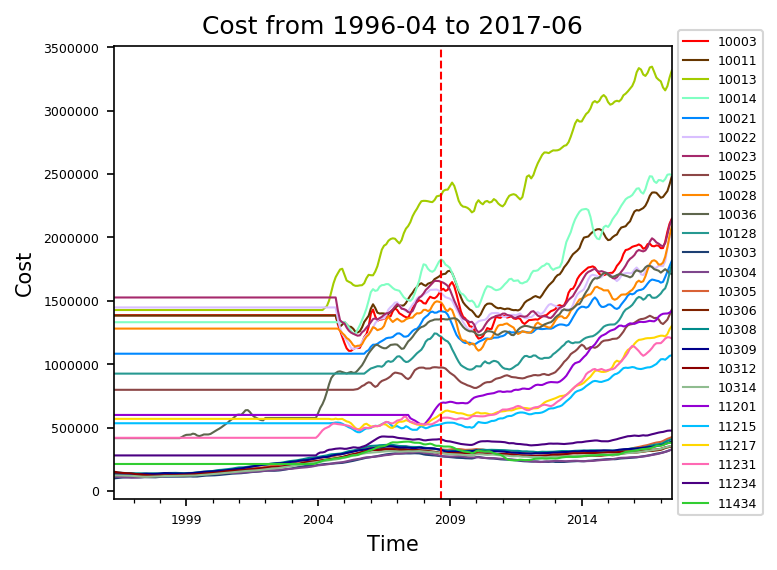

In [76]:
# Draw graph to show the trend of cost from 1996 to 2017
df0 = df0_cost.pivot(index='Time', columns='zipcode', values='Cost')
df0 = df0.ffill().bfill()
ax = df0.plot(fontsize = 6,linewidth = 1)
ax.set_ylabel('Cost')
ax.set_title('Cost from 1996-04 to 2017-06')
ax.axvline('2008-09-01',color = 'red', linestyle = '--', linewidth = 1)
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5),prop={'size': 6})

plt.show()

I will get rid of "Cost" with null values >10% because:
1. Cost before 2010-07 has more than 10% missing values. From the graph, we can see that even though I impute the missing values by forward and backward filling, no trend show before 2004 due to the large amount of missing values.
2. From the graph, we can see that the price of real estate properties had declined from 2008 to 2009 because of the 2008 recession. Therefore, I want to get rid of the abnormal factor in the dataset.

In [331]:
# Drop missing values >10%
def dataPrepare2(df_cost):
    pct_null =  df_cost.isnull().sum() * 100 / len(df_cost)
    missing_values = pct_null[pct_null > 10].index
    df_cost.drop(missing_values, axis=1, inplace=True)
    df_cost = dataPrepare1(df_cost)
    return df_cost

In [334]:
df1_cost = dataPrepare2(df_cost)
df1_cost

,RegionID,zipcode,SizeRank,Time,Cost
0,61639,10025,1,2010-08-01,863500.0
2,61637,10023,3,2010-08-01,1366400.0
13,61703,10128,14,2010-08-01,1019400.0
14,61625,10011,15,2010-08-01,1476600.0
20,61617,10003,21,2010-08-01,1279100.0
...,...,...,...,...,...
735529,61780,10304,1958,2017-06-01,328300.0
735658,61781,10305,2087,2017-06-01,425100.0
737253,61785,10309,3682,2017-06-01,390500.0
737720,61784,10308,4149,2017-06-01,409500.0


In [65]:
# Understand the new dataset
def main():
    print("***Count number of rows and columns in the dataset***")
    print("Number of rows and columns in the dataset", df1_cost.shape, sep='\n')
    print("***Count number of unique zipcode in the dataset***")
    print("Number of unique zipcode in the dataset", df1_cost.zipcode.nunique(), sep='\n')
    print("***Look at the type of the variables in the dataset***")
    print("Type of variables in the dataset", df1_cost.dtypes, sep='\n')
    print("***Count all NaN in a DataFrame (both columns & Rows)***")
    print("Total NaN in DataFrame" , df1_cost.isnull().sum().sum(), sep='\n')
    
if __name__ == '__main__':
        main()

***Count number of rows and columns in the dataset***
Number of rows and columns in the dataset
(2075, 5)
***Count number of unique zipcode in the dataset***
Number of unique zipcode in the dataset
25
***Look at the type of the variables in the dataset***
Type of variables in the dataset
RegionID             int64
zipcode             object
SizeRank             int64
Time        datetime64[ns]
Cost               float64
dtype: object
***Count all NaN in a DataFrame (both columns & Rows)***
Total NaN in DataFrame
0


After filtering, there are 25 unique zipcode in this dataset. There is no missing values in the dataset.

## Determine the Cost

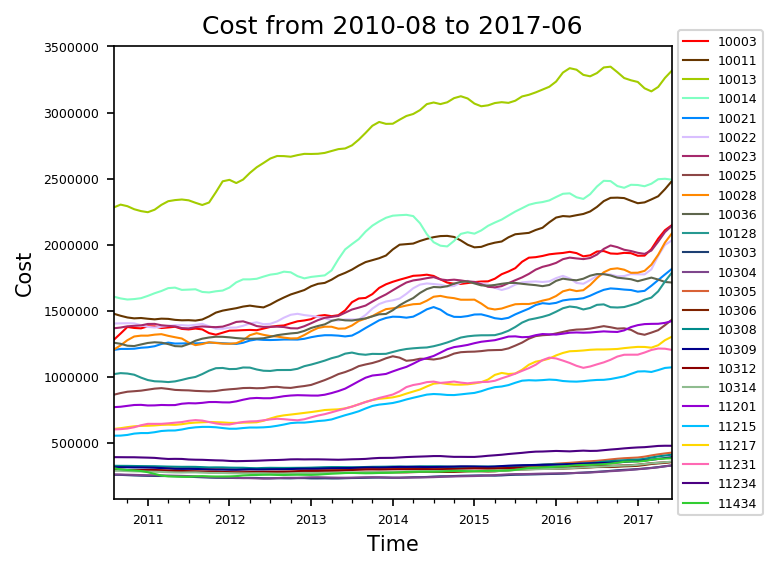

In [63]:
df1 = df1_cost.pivot(index='Time', columns='zipcode', values='Cost')
ax1 = df1.plot(fontsize = 6,linewidth = 1)
ax1.set_ylabel('Cost')
ax1.set_title('Cost from 2010-08 to 2017-06')
box = ax1.get_position()
ax1.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax1.legend(loc='center left', bbox_to_anchor=(1, 0.5),prop={'size': 6})

plt.show()

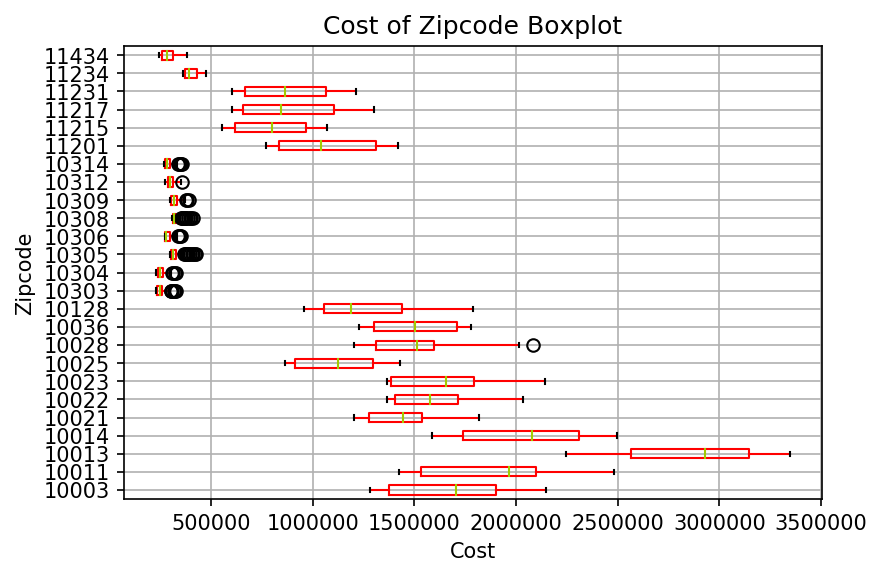

In [64]:
ax2 = df1.boxplot(vert=False)
ax2.set_xlabel('Cost')
ax2.set_ylabel('Zipcode')
ax2.set_title('Cost of Zipcode Boxplot')
plt.show()

Use median price of month July to calculate the cost.

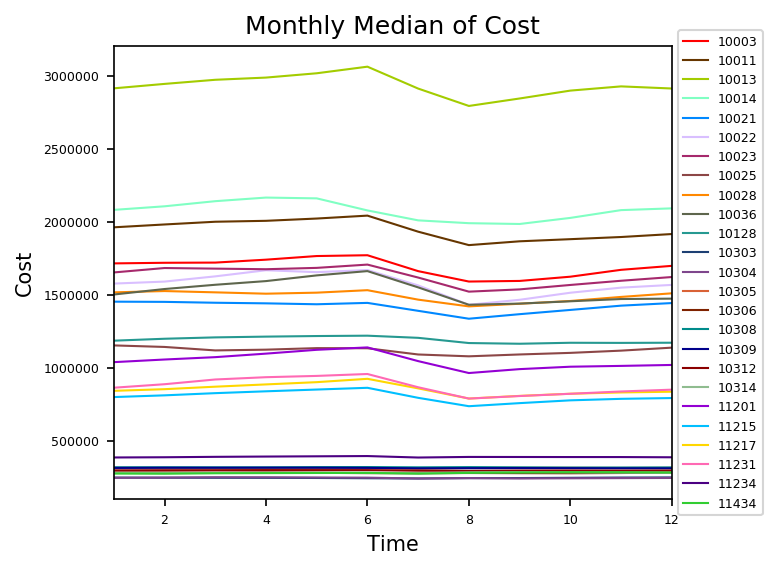

In [81]:
# Monthly median
index_month = df1.index.month
median_df_by_month = df1.groupby(index_month).median()
ax3 = median_df_by_month.plot(fontsize=6, linewidth = 1)
ax3.set_ylabel('Cost')
ax3.set_title('Monthly Median of Cost')
box1 = ax3.get_position()
ax3.set_position([box1.x0, box1.y0, box1.width * 0.8, box1.height])
ax3.legend(loc='center left', bbox_to_anchor=(1, 0.5),prop={'size': 6})
plt.show()

In [335]:
df = df1_cost
df['month'] = pd.DatetimeIndex(df['Time']).month
df = df[df["month"] == 7].groupby('zipcode').median()
df = df.reset_index()
df.drop(["Time","month"],axis=1,inplace=True)
df

KeyError: "['Time'] not found in axis"

In [ ]:
df2 = df2[df2['Time'].dt.month == 7]

In [ ]:
df = df[df["month"] == 7].groupby('zipcode').max()
df.drop(["Time","month"],axis=1,inplace=True)

In [251]:
df2 = df1_cost
df2['month'] = pd.DatetimeIndex(df2['Time']).month
df2 = df2.set_index('Time').groupby('zipcode').resample('M').median()
df2

RegionID  SizeRank       Cost  month
zipcode Time                                            
10003   2010-08-31     61617        21  1279100.0      8
        2010-09-30     61617        21  1326700.0      9
        2010-10-31     61617        21  1376500.0     10
        2010-11-30     61617        21  1368900.0     11
        2010-12-31     61617        21  1366000.0     12
...                      ...       ...        ...    ...
11434   2017-02-28     62120       622   361900.0      2
        2017-03-31     62120       622   370800.0      3
        2017-04-30     62120       622   377100.0      4
        2017-05-31     62120       622   380200.0      5
        2017-06-30     62120       622   382300.0      6

[2075 rows x 4 columns]

In [ ]:
for column in df2[['month']]:
    if column == 7
    gnumbers = (([pop] - population[pop-1]) * 100.0 / population[pop-1])

In [259]:
growth_rate = []
for column in df2:
    if df2['month'] == '7'
    gnumbers = ((df2[['Cost']][column] - df2[['Cost']][column-1]) * 100.0 / df2[['Cost']][column-1])
    growth_rate.append(gnumbers)
    print(growth_rate)

SyntaxError: invalid syntax (<ipython-input-259-29703173ade0>, line 3)

## Clean Airbnb Dataset

In [299]:
df_revenue = pd.read_csv("listings.csv")
df_revenue.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2539,https://www.airbnb.com/rooms/2539,20190708031610,43655,Clean & quiet apt home by the park,Renovated apt home in elevator building.,"Spacious, renovated, and clean apt home, one b...",Renovated apt home in elevator building. Spaci...,none,Close to Prospect Park and Historic Ditmas Park,If this room is unavailable on your desired da...,Very close to F and G trains and Express bus i...,NaN,NaN,-The security and comfort of all our guests is...,NaN,NaN,https://a0.muscache.com/im/pictures/3949d073-a...,NaN,2787,https://www.airbnb.com/users/show/2787,John,39698.0,"New York, New York, United States",Educated professional living in Brooklyn. I l...,within an hour,1.00,NaN,f,https://a0.muscache.com/im/pictures/8674565a-7...,https://a0.muscache.com/im/pictures/8674565a-7...,Gravesend,6.0,6.0,"['email', 'phone', 'reviews', 'kba']",t,t,"Brooklyn , NY, United States",Brooklyn,Kensington,Brooklyn,Brooklyn,NY,11218,New York,"Brooklyn , NY",US,United States,40.64749,-73.97237,f,Apartment,Private room,2,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Wheelchair acces...",NaN,149,299.0,999.0,100.0,25.0,1,35,1,730,1,1,730,730,1.0,730.0,3 weeks ago,t,30,60,90,365,43655,9,2,42342.0,43392.0,98.0,10.0,10.0,10.0,10.0,10.0,10.0,f,NaN,NaN,f,f,moderate,f,f,6,0,5,1,0.21
1,2595,https://www.airbnb.com/rooms/2595,20190708031610,43655,Skylit Midtown Castle,"Find your romantic getaway to this beautiful, ...","- Spacious (500+ftÂ²), immaculate and nicely f...","Find your romantic getaway to this beautiful, ...",none,Centrally located in the heart of Manhattan ju...,NaN,Apartment is located on 37th Street between 5t...,"Guests have full access to the kitchen, bathro...",I am a Sound Therapy Practitioner and Kundalin...,"Make yourself at home, respect the space and t...",NaN,NaN,https://a0.muscache.com/im/pictures/f0813a11-4...,NaN,2845,https://www.airbnb.com/users/show/2845,Jennifer,39700.0,"New York, New York, United States",A New Yorker since 2000! My passion is creatin...,within a few hours,0.87,NaN,f,https://a0.muscache.com/im/users/2845/profile_...,https://a0.muscache.com/im/users/2845/profile_...,Midtown,5.0,5.0,"['email', 'phone', 'reviews', 'kba', 'work_ema...",t,t,"New York, NY, United States",Manhattan,Midtown,Manhattan,New York,NY,100

In [49]:
# From the warning, columns (43, 94, 95) have mixed data types
# Look at columns (43, 94, 95)
print(df_revenue.iloc[:,43])
print(df_revenue.iloc[:,94])
print(df_revenue.iloc[:,95])

0        11218
1        10018
2        10027
3        11238
4        10029
         ...  
48890    11216
48891    11206
48892    10027
48893    10036
48894    10019
Name: zipcode, Length: 48895, dtype: object
0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
        ... 
48890    NaN
48891    NaN
48892    NaN
48893    NaN
48894    NaN
Name: license, Length: 48895, dtype: object
0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
        ... 
48890    NaN
48891    NaN
48892    NaN
48893    NaN
48894    NaN
Name: jurisdiction_names, Length: 48895, dtype: object


I will not use "license" and "jurisdiction_names" columns to do analysis since there is no data available in "jurisdiction_names" column and "license" has little relationship with profitabiity. Thus, I only need to convert all the data in "zipcode" to string data type.

In [50]:
df_revenue.zipcode.unique()

array(['11218', '10018', '10027', '11238', '10029', '10016', '11216',
       '10019', '10025', '10002', '10036', '11215', '10014', '11211',
       '11205', '10011', '11217', '10034', '10003', '10031', '11222', nan,
       '11237', '11226', '10009', '10024', '11225', '11101', '11221',
       '11206', '10010', '11249', '10001', '10162', '10035', '10032',
       '10075', '11377', '11201', '11233', '11231', '10023', '10128',
       '10040', '11234', '11367', '10028', '11104', '10065', '10301',
       '10452', '10006', '10039', '11385', '10021', '11434', '11379',
       '10026', '11105', '10044', '10022', '10013', '11103', '10473',
       '10475', '11213', '10468', '11102', '10038', '10033', '11427',
       '11693', '10012', '11375', '10470', '10030', '10453', '11223',
       '10469', '11208', '11207', '10451', '11235', '10314', '11209',
       '11204', '10305', '11232', '10017', '11373', '11224', '11372',
       '11412', '10004', '11203', '11374', '10466', '11106', '10304',
       '11220',

"zipcode" column contains two data types: object and float. I'll convert all the data in "zipcode" column into string data type
when prepare the dataset.

In [51]:
# Understand the Airbnb dataset
def main():
    print("***Count number of rows and columns in the dataset***")
    print("Number of rows and columns in the dataset", df_revenue.shape, sep='\n')
    print("***Look at the type of the variables in the dataset***")
    print("Type of variables in the dataset", df_revenue.dtypes, sep='\n')
    print("***Find duplicated rows in the dataset***")
    print("Duplicated rows in the dataset", df_revenue.duplicated(subset=None, keep='first'))
    print("***Find duplicated columns in the dataset***")
    print("Duplicated columns in the dataset", df_revenue.T.duplicated().sum())
    print("***Find negative values in price***")
    print("Count all negative values in price",df_revenue.iloc[:,df_revenue.columns.get_loc("price"):df_revenue.columns.get_loc("guests_included")].agg(lambda x: sum(x < 0)).sum())
    print("***Count all NaN in a DataFrame (both columns & Rows)***")
    print("Total NaN in DataFrame" , df_revenue.isnull().sum().sum(), sep='\n')
    print("***Count NaN in each column of the DataFrame***")
    print("Nan in each columns" , df_revenue.isnull().sum(), sep='\n')
    print("***Count percentage of NaN in each column of the DataFrame***")
    print("Percentage of NaN in each column", df_revenue.isnull().sum() * 100 / len(df_revenue),sep='\n')
    
if __name__ == '__main__':
        main() 

***Count number of rows and columns in the dataset***
Number of rows and columns in the dataset
(48895, 106)
***Look at the type of the variables in the dataset***
Type of variables in the dataset
id                                                int64
listing_url                                      object
scrape_id                                         int64
last_scraped                                      int64
name                                             object
summary                                          object
space                                            object
description                                      object
experiences_offered                              object
neighborhood_overview                            object
notes                                            object
transit                                          object
access                                           object
interaction                                      object
house_rules        

There are several data quality issues in this dataset.
1. There are 763802 missing values in the dataset. Missing values will hinder the further analysis.
2. columns (43, 94, 95) have mixed data types. 
3. some data are misrepresented. For example, in the "city" column, some values are not cities but boroughs in the cities, such as "Brooklyn".
4. Several columns have 100% missing values, such as "thumbnail_url", "medium_url", "xl_picture_url", "host_acceptance_rate", "license", "jurisdiction_names". "square_feet" has 99.1% missing values.
5. There are 6 duplicated columns in the dataset.

In [52]:
# Determine the criteria to filter the dataset
df_revenue_location = df_revenue[["host_neighbourhood","street","neighbourhood_cleansed","neighbourhood_group_cleansed","city","state","zipcode","market","smart_location","country_code","country","bedrooms"]].copy()
df_revenue_location = df_revenue_location[(df_revenue_location['bedrooms'] == 2)].copy()
print(df_revenue_location.country.unique())
print(df_revenue_location.country_code.unique())
print(df_revenue_location.state.unique())
print(df_revenue_location.city.unique())
print(df_revenue_location.neighbourhood_group_cleansed.unique())

['United States']
['US']
['NY' 'Ny' nan]
['New York' 'Brooklyn' 'Queens' 'Long Island City' 'Riverdale ' 'Bronx'
 'Staten Island' 'Brooklyn ' 'Astoria' 'Jamaica' 'ASTORIA'
 'long island city' 'NY' 'Kew Garden Hills\nnew York' 'LONG ISLAND CITY'
 'Rockaway beach' 'Fort Greene, Brooklyn' 'Park Slope, Brooklyn' 'bronx'
 'Saint Albans(Queens)' 'EAST ELMHURST' 'jackson heights' 'New York City'
 'Woodside' nan 'Astoria ' 'Brooklyn, New York' 'Bushwick/Ridgewood'
 'Forest Hills' 'RIVERDALE' 'Bushwick' 'astoria' 'Chelsea, New York'
 'Long Island city' 'Fresh Meadows ' 'MIDDLE VILLAGE' 'new york'
 'East Elmhurst' 'New York ' 'Queens ' 'Jackson Heights' 'Brookyn '
 'Ridgewood' 'Flushing ' 'Rockaway Beach' 'Forest Hills ' 'Rosedale '
 'Williamsburg,Brooklyn' 'Flushing' 'Jackson Heights '
 'Greenpoint, Brooklyn' 'Brooklyn, NY 11221 ' 'Ridgewood ' 'flushing'
 'Howard Beach' 'Glendale ' 'Arverne' 'Sunnyside ' 'Woodside ' ' Brooklyn'
 'NYC' 'brooklyn' 'Flushing or east Elmhurst ' 'Elmhurst ' 'New yor

After filtering the "bedrooms" column, all the airbnbs in the dataset are in United States and New York State. Although the data are messy in the "city" column, almost all the places are located in New York City. Therefore, I'll assume the airbnbs are located in New York City and only use bedroom number = 2 to filter the dataset.

In [53]:
# Look at number of missing values in "zipcode" column after filtering the dataset to contain airbnb that only has 2 bedrooms
df_test = df_revenue[(df_revenue['bedrooms'] == 2)].copy()
print(df_test['zipcode'].isnull().sum())
print(df_test['zipcode'].isnull().sum() * 100 / len(df_test['zipcode']))

50
0.7695859627520394


Since there is only 50 missing values in the "zipcode" column and the missing values only account for 0.78% of the column, I will remove the missing values in "zipcode".

In [271]:
# Create a function to find duplicate columns in the dataset 
def getDuplicateColumns(df):
    
    duplicateColumnNames = set()
    # Iterate over all the columns in dataframe
    for x in range(df.shape[1]):
        # Select column at xth index.
        col = df.iloc[:, x]
        # Iterate over all the columns in DataFrame from (x+1)th index till end
        for y in range(x + 1, df.shape[1]):
            # Select column at yth index.
            otherCol = df.iloc[:, y]
            # Check if two columns at x 7 y index are equal
            if col.equals(otherCol):
                duplicateColumnNames.add(df.columns.values[y])
 
    return list(duplicateColumnNames)

In [272]:
# Get list of duplicate columns
duplicateColumnNames = getDuplicateColumns(df_revenue)
 
print('Duplicate Columns are as follows')
for col in duplicateColumnNames:
    print('Column name : ', col)

Duplicate Columns are as follows
Column name :  host_total_listings_count
Column name :  medium_url
Column name :  host_acceptance_rate
Column name :  calendar_last_scraped
Column name :  is_business_travel_ready
Column name :  xl_picture_url


In [300]:
def dataPreprocess(df_revenue):
    # Filter the dataset to select the variables that will be used in the analysis
    df_revenue = df_revenue[["id","scrape_id","host_id","host_listings_count","zipcode","neighbourhood_group_cleansed","latitude","longitude","is_location_exact","property_type","room_type","accommodates","bedrooms","price","weekly_price","monthly_price","security_deposit","cleaning_fee","extra_people","minimum_nights","maximum_nights","calendar_updated","availability_30","availability_60","availability_90","availability_365","number_of_reviews","review_scores_rating","reviews_per_month"]].copy()
    # Filter the dataset to contain airbnb that only has 2 bedrooms and the location is verified
    df_revenue = df_revenue[(df_revenue['bedrooms'] == 2) & (df_revenue['is_location_exact'] == 't')].copy()
    # Drop the missing values in "zipcode" column
    df_revenue = df_revenue.dropna(subset=['zipcode'])
    # Conver the "zipcode" column into string data type
    df_revenue.zipcode = df_revenue.zipcode.astype('int64').astype(str)
    # Get rid of the last 6 digits of "scrape_id" column and convert to string data type
    df_revenue['scrape_id']= df_revenue['scrape_id'].floordiv(1000000).astype(str)
    # Convet "scrape_id" column to datetime data type
    df_revenue.scrape_id = pd.to_datetime(df_revenue.scrape_id, format='%Y-%m-%d')
    # Assume some airbnbs don't have weekly price, monthly price,security_deposit and cleaning fee, rating and monthly review.
    # Impute missing values in "weekly_price", "monthly_price", "security_deposit", "cleaning_fee", "review_scores_rating", "reviews_per_month" with 0.
    df_revenue[['weekly_price','monthly_price','security_deposit','cleaning_fee','review_scores_rating','reviews_per_month']] =  df_revenue[['weekly_price','monthly_price','security_deposit','cleaning_fee','review_scores_rating','reviews_per_month']].fillna(0)
    # Convert "price" to float data type
    df_revenue.price = df_revenue.price.astype('float64')
    # Rename "scrape_id" column to "date"
    df_revenue.rename(index=str, columns={"scrape_id": "date"},inplace=True)
    # Remove "bedroom" column
    df_revenue.drop(["bedrooms"],axis=1,inplace=True)
    return df_revenue

In [301]:
df1_revenue = dataPreprocess(df_revenue)

In [58]:
# Understand the new dataset
def main():
    print("***Count number of rows and columns in the dataset***")
    print("Number of rows and columns in the dataset", df1_revenue.shape, sep='\n')
    print("***Count number of unique zipcode in the dataset***")
    print("Number of unique zipcode in the dataset", df1_revenue.zipcode.nunique(), sep='\n')
    print("***Look at the type of the variables in the dataset***")
    print("Type of variables in the dataset", df1_revenue.dtypes, sep='\n')
    print("***Count all NaN in a DataFrame (both columns & Rows)***")
    print("Total NaN in DataFrame" , df1_revenue.isnull().sum().sum(), sep='\n')
    
if __name__ == '__main__':
        main()

***Count number of rows and columns in the dataset***
Number of rows and columns in the dataset
(5553, 25)
***Count number of unique zipcode in the dataset***
Number of unique zipcode in the dataset
167
***Look at the type of the variables in the dataset***
Type of variables in the dataset
id                               int64
date                    datetime64[ns]
zipcode                         object
latitude                       float64
longitude                      float64
is_location_exact               object
property_type                   object
room_type                       object
bedrooms                       float64
price                          float64
weekly_price                   float64
monthly_price                  float64
security_deposit               float64
cleaning_fee                   float64
extra_people                     int64
minimum_nights                   int64
maximum_nights                   int64
calendar_updated                object
availab

In [310]:
new = df.merge(df1_revenue, on = "zipcode")
new.head()

,zipcode,RegionID,SizeRank,Cost,id,date,host_id,host_listings_count,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,is_location_exact,property_type,room_type,accommodates,price,weekly_price,monthly_price,security_deposit,cleaning_fee,extra_people,minimum_nights,maximum_nights,calendar_updated,availability_30,availability_60,availability_90,availability_365,number_of_reviews,review_scores_rating,reviews_per_month
0,10003,61617,21,1947600.0,103806,2019-07-08,251176,6.0,East Village,Manhattan,40.72577,-73.98745,t,Apartment,Entire home/apt,6,249.0,0.0,0.0,250.0,85.0,25,5,365,yesterday,30,60,90,365,166,85.0,1.68
1,10003,61617,21,1947600.0,126443,2019-07-08,627217,3.0,East Village,Manhattan,40.72939,-73.98857,t,Apartment,Entire home/apt,9,189.0,2793.0,8500.0,400.0,115.0,30,2,28,today,0,2,8,201,403,86.0,4.10
2,10003,61617,21,1947600.0,173742,2019-07-08,829652,2.0,Gramercy,Manhattan,40.73476,-73.98452,t,Apartment,Entire home/apt,5,400.0,2700.0,8500.0,500.0,120.0,25,2,8,3 weeks ago,0,5,32,304,105,94.0,1.13
3,10003,61617,21,1947600.0,321014,2019-07-08,1644452,1.0,Gramercy,Manhattan,40.73294,-73.98282,t,Apartment,Entire home/apt,4,245.0,1800.0,6200.0,1000.0,200.0,25,5,1125,3 weeks ago,0,0,0,0,18,96.0,0.21
4,10003,61617,21,1947600.0,369671,2019-07-08,1863713,1.0,East Village,Manhattan,40.72899,-73.97792,t,Apartment,Entire home/apt,4,549.0,0.0,0.0,0.0,150.0,50,30,365,2 weeks ago,14,21,22,200,58,94.0,0.66


In [267]:
new.zipcode.nunique()

24

In [266]:
new.zipcode.unique()

array(['10003', '10011', '10013', '10014', '10021', '10022', '10023',
       '10025', '10028', '10036', '10128', '10303', '10304', '10305',
       '10306', '10308', '10309', '10314', '11201', '11215', '11217',
       '11231', '11234', '11434'], dtype=object)

In [172]:
df1_cost.zipcode.unique()

array(['10025', '10023', '10128', '10011', '10003', '11201', '11234',
       '10314', '11215', '10028', '10021', '10014', '10036', '11434',
       '10306', '10312', '10022', '11217', '10013', '11231', '10304',
       '10305', '10309', '10308', '10303'], dtype=object)

Lack of zipcode 10321.

In [312]:
# Understand merged dataset
def main():
    print("***Count number of rows and columns in the dataset***")
    print("Number of rows and columns in the dataset", new.shape, sep='\n')
    print("***Count number of unique zipcode in the dataset***")
    print("Number of unique zipcode in the dataset", new.zipcode.nunique(), sep='\n')
    print("***Look at the type of the variables in the dataset***")
    print("Type of variables in the dataset", new.dtypes, sep='\n')
    print("***Count all NaN in a DataFrame (both columns & Rows)***")
    print("Total NaN in DataFrame" , new.isnull().sum().sum(), sep='\n')
    
if __name__ == '__main__':
        main()

***Count number of rows and columns in the dataset***
Number of rows and columns in the dataset
(1368, 32)
***Count number of unique zipcode in the dataset***
Number of unique zipcode in the dataset
24
***Look at the type of the variables in the dataset***
Type of variables in the dataset
zipcode                                 object
RegionID                                 int64
SizeRank                                 int64
Cost                                   float64
id                                       int64
date                            datetime64[ns]
host_id                                  int64
host_listings_count                    float64
neighbourhood_cleansed                  object
neighbourhood_group_cleansed            object
latitude                               float64
longitude                              float64
is_location_exact                       object
property_type                           object
room_type                               object
accom

In [303]:
df3 = new[new['room_type'] == 'Private room'].copy()
df3

,zipcode,RegionID,SizeRank,Cost,id,date,host_id,host_listings_count,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,is_location_exact,property_type,room_type,accommodates,price,weekly_price,monthly_price,security_deposit,cleaning_fee,extra_people,minimum_nights,maximum_nights,calendar_updated,availability_30,availability_60,availability_90,availability_365,number_of_reviews,review_scores_rating,reviews_per_month
8,10003,61617,21,1947600.0,1307095,2019-07-08,6714376,1.0,Gramercy,Manhattan,40.73227,-73.98451,t,Apartment,Private room,2,109.0,0.0,0.0,300.0,65.0,10,5,1125,3 days ago,10,22,22,22,5,100.0,0.07
55,10003,61617,21,1947600.0,11638339,2019-07-08,1547578,1.0,East Village,Manhattan,40.72868,-73.98635,t,Apartment,Private room,2,90.0,0.0,0.0,250.0,50.0,10,15,1125,18 months ago,0,0,0,0,1,0.0,0.04
66,10003,61617,21,1947600.0,14759888,2019-07-08,6049738,3.0,East Village,Manhattan,40.73029,-73.98725,t,House,Private room,2,95.0,0.0,0.0,0.0,25.0,0,4,1125,5 months ago,0,0,0,0,9,91.0,0.26
70,10003,61617,21,1947600.0,17044038,2019-07-08,20481502,1.0,East Village,Manhattan,40.72429,-73.98784,t,Apartment,Private room,1,80.0,0.0,0.0,1765.0,50.0,0,90,180,23 months ago,23,53,83,173,0,0.0,0.00
87,10003,61617,21,1947600.0,26003793,2019-07-08,134613498,8.0,East Village,Manhattan,40.72811,-73.98824,t,Apartment,Private room,4,285.0,0.0,0.0,0.0,50.0,12,1,1125,2 days ago,0,0,0,0,0,0.0,0.00
88,10003,61617,21,1947600.0,26005261,2019-07-08,134613498,8.0,East Village,Manhattan,40.72814,-73.98665,t,Apartment,Private room,4,250.0,0.0,0.0,0.0,50.0,0,1,1125,3 days ago,30,60,90,365,1,80.0,0.08
170,10011,61625,15,2285200.0,19218475,2019-07-08,134510659,1.0,Chelsea,Manhattan,40.74319,-73.99636,t,Apartment,Private room,2,90.0,0.0,0.0,0.0,0.0,0,14,1125,25 months ago,0,0,0,0,0,0.0,0.00
188,10011,61625,15,2285200.0,26039252,2019-07-08,195689083,1.0,West Village,Manhattan,40.74012,-74.00537,t,Apartment,Private room,2,50.0,0.0,0.0,5000.0,40.0,10,2,30,a week ago,11,16,21,21,56,95.0,4.35
212,10011,61625,15,2285200.0,35497792,2019-07-08,267068278,1.0,Chelsea,Manhattan,40.74704,-74.00239,t,Apartment,Private room,2,105.0,0.0,0.0,0.0,60.0,0,1,28,3 weeks ago,4,15,21,21,1,100.0,1.00
232,10013,61627,1744,3298600.0,7511452,2019-07-08,2588427,2.0,SoHo,Manhattan,40.72547,-74.01000,t,Townhouse,Private room,4,300.0,1500.0,5000.0,0.0,0.0,0,7,90,2 months ago,7,37,67,156,51,90.0,1.11


In [314]:
df3['host_id'].value_counts()
df3[df3['host_id']==134613498]

,zipcode,RegionID,SizeRank,Cost,id,date,host_id,host_listings_count,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,is_location_exact,property_type,room_type,accommodates,price,weekly_price,monthly_price,security_deposit,cleaning_fee,extra_people,minimum_nights,maximum_nights,calendar_updated,availability_30,availability_60,availability_90,availability_365,number_of_reviews,review_scores_rating,reviews_per_month
87,10003,61617,21,1947600.0,26003793,2019-07-08,134613498,8.0,East Village,Manhattan,40.72811,-73.98824,t,Apartment,Private room,4,285.0,0.0,0.0,0.0,50.0,12,1,1125,2 days ago,0,0,0,0,0,0.0,0.00
88,10003,61617,21,1947600.0,26005261,2019-07-08,134613498,8.0,East Village,Manhattan,40.72814,-73.98665,t,Apartment,Private room,4,250.0,0.0,0.0,0.0,50.0,0,1,1125,3 days ago,30,60,90,365,1,80.0,0.08


In [306]:
df3.iloc[87:170,df3.columns.get_loc("price"):df3.columns.get_loc("cleaning_fee")].sum()

price               0.0
weekly_price        0.0
monthly_price       0.0
security_deposit    0.0
dtype: float64

In [ ]:
if 